<a href="https://colab.research.google.com/github/AthulyaLesslie/Health-Index-Score-Prediction/blob/main/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Science/Project-HIS Prediction/For_Vis-Global_HIS.csv')

In [ ]:
df.shape

(32478, 16)

In [ ]:
df.head()

,Year,Country,Disease Name,Disease Category,Most Affected Age,Population Affected,Healthcare Access (%),Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Education Index,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Recovery Rate (%),Health Index Score
0,2023,Italy,Diabetes,Metabolic,36-60,431948.0,88.04,Vaccination,602.0,Yes,0.76,10.62,6.28,2.62,90.47,0.735106
1,2007,South Africa,Influenza,Viral,61+,500411.0,81.57,Medication,14745.0,Yes,0.54,1.31,4.65,9.17,91.44,0.701330
2,2010,Saudi Arabia,Malaria,Parasitic,61+,839806.0,64.08,Medication,859.0,No,0.59,8.52,2.07,4.87,51.53,0.623462
3,2007,Australia,Parkinson's Disease,Neurological,19-35,631934.0,83.30,Surgery,590.0,Yes,0.44,17.05,8.35,5.22,59.03,0.647905
4,2016,Mexico,Polio,Viral,61+,424011.0,76.32,Surgery,281.0,No,0.55,8.33,2.39,4.98,81.56,0.702743


In [ ]:
def categorize_health(score):
    if score <= 0.55:
        return "Poor"
    elif score < 0.64:
        return "Moderate"
    elif score < 0.72:
        return "Good"
    else:
        return "Excellent"

df["Health Assessment"] = df["Health Index Score"].apply(categorize_health)


In [ ]:
df.shape

(32478, 17)

In [ ]:
df.head(2)

,Year,Country,Disease Name,Disease Category,Most Affected Age,Population Affected,Healthcare Access (%),Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Education Index,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Recovery Rate (%),Health Index Score,Health Assessment
0,2023,Italy,Diabetes,Metabolic,36-60,431948.0,88.04,Vaccination,602.0,Yes,0.76,10.62,6.28,2.62,90.47,0.735106,Excellent
1,2007,South Africa,Influenza,Viral,61+,500411.0,81.57,Medication,14745.0,Yes,0.54,1.31,4.65,9.17,91.44,0.701330,Good


In [ ]:
df.shape

(32478, 17)

In [ ]:
df['Health Assessment'].value_counts()

,count
Health Assessment,
Good,14946
Moderate,11401
Excellent,4397
Poor,1734


# Distribution Of Health Index Score

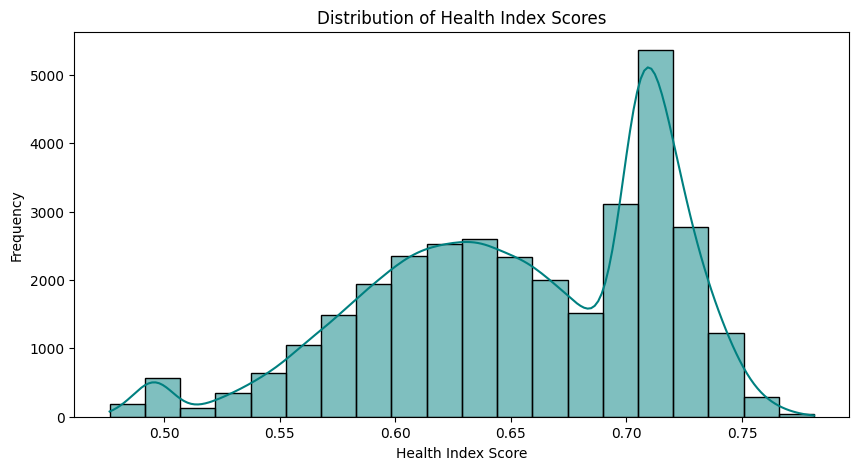

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.histplot(df["Health Index Score"], bins=20, kde=True, color="teal")
plt.title("Distribution of Health Index Scores")
plt.xlabel("Health Index Score")
plt.ylabel("Frequency")
plt.show()


Most Health Index Scores fall between 0.60 and 0.70, indicating that the majority of countries have moderate to good healthcare conditions.

# Distribution of Categorical Features

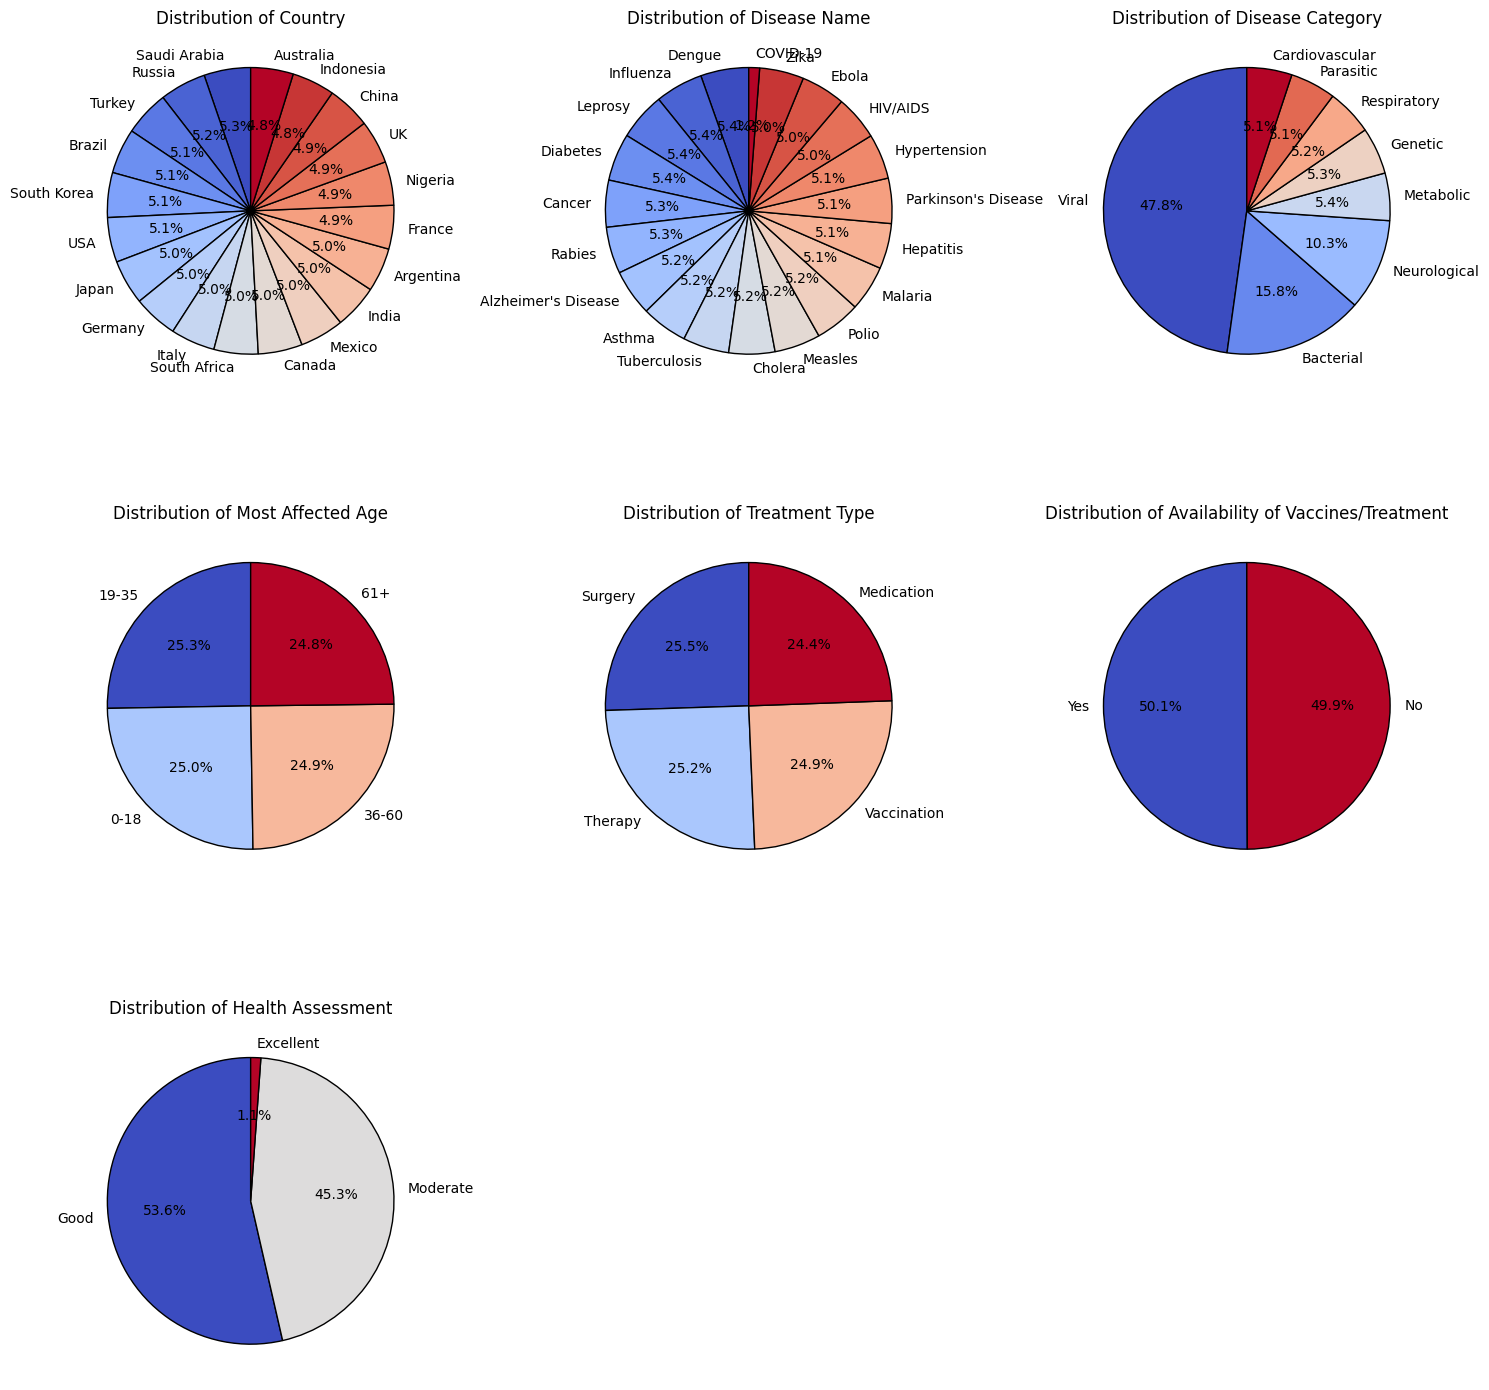

In [ ]:
categorical_cols = ["Country", "Disease Name", "Disease Category", "Most Affected Age", "Treatment Type", "Availability of Vaccines/Treatment", "Health Assessment"]

# Define the number of rows and columns for subplots
n_cols = 3  # Number of columns in the grid
n_rows = -(-len(categorical_cols) // n_cols)  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each pie chart
for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot.pie(ax=axes[i], autopct="%1.1f%%", cmap="coolwarm", startangle=90, wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel("")  # Remove y-axis label for clarity

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Distribution of Numerical Features

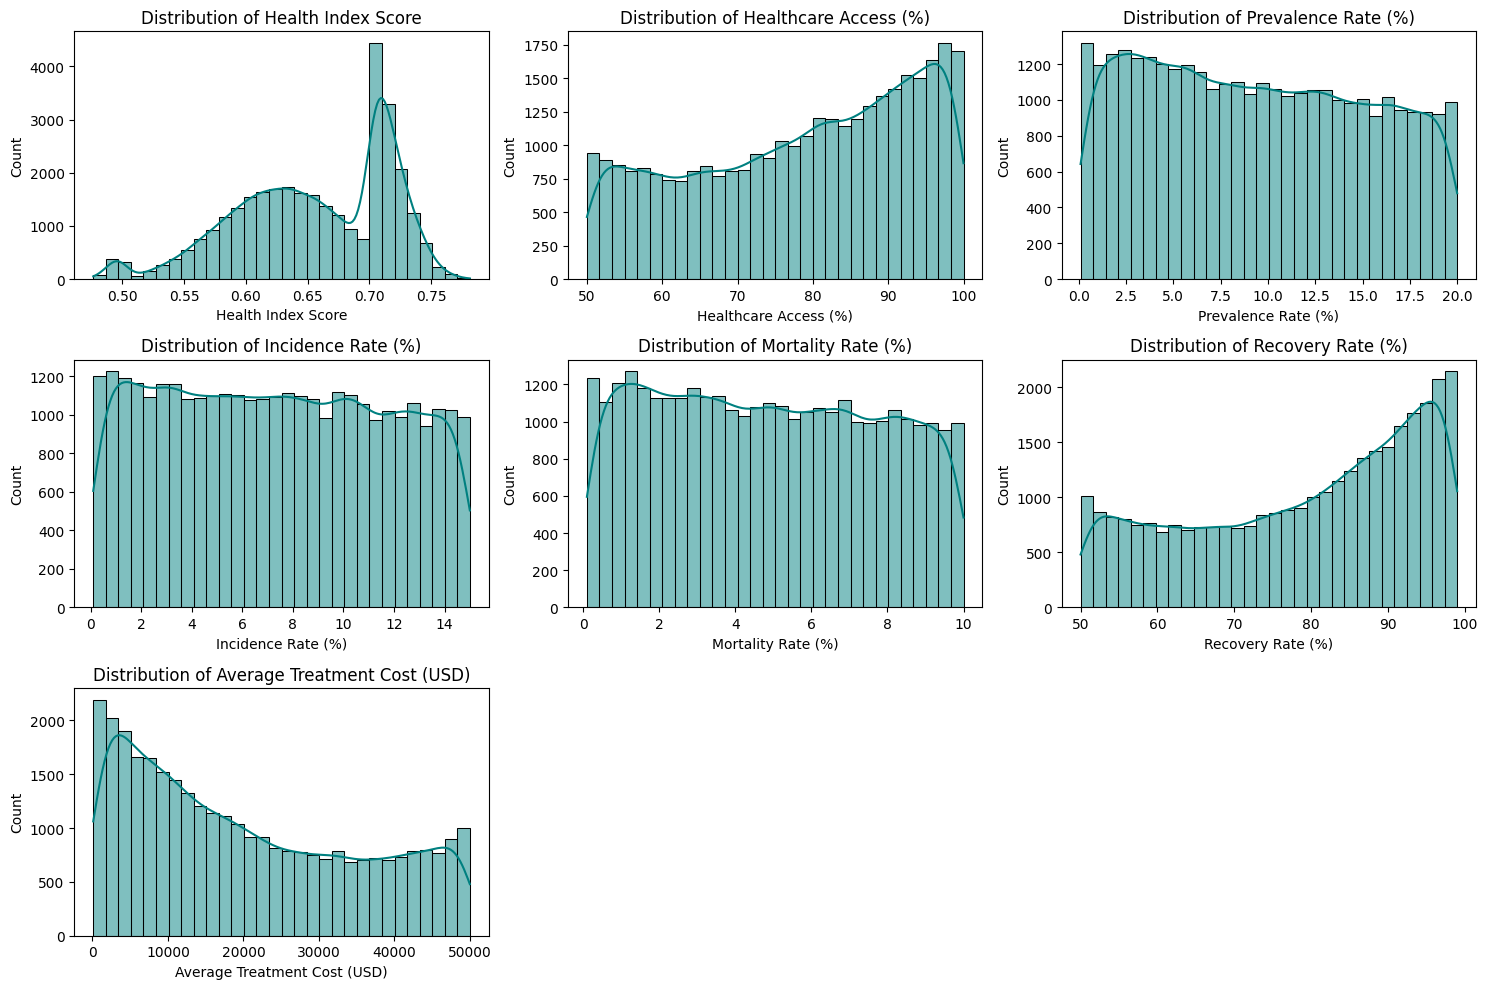

In [ ]:

numerical_cols = ["Health Index Score", "Healthcare Access (%)", "Prevalence Rate (%)",
                  "Incidence Rate (%)", "Mortality Rate (%)", "Recovery Rate (%)",
                  "Average Treatment Cost (USD)"]

# Plot histograms for all numerical columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  # Adjust grid size
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="teal")
    axes[i].set_title(f"Distribution of {col}")

# Hide extra subplots if columns < total subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Average Health Index Score Trend Over the Years

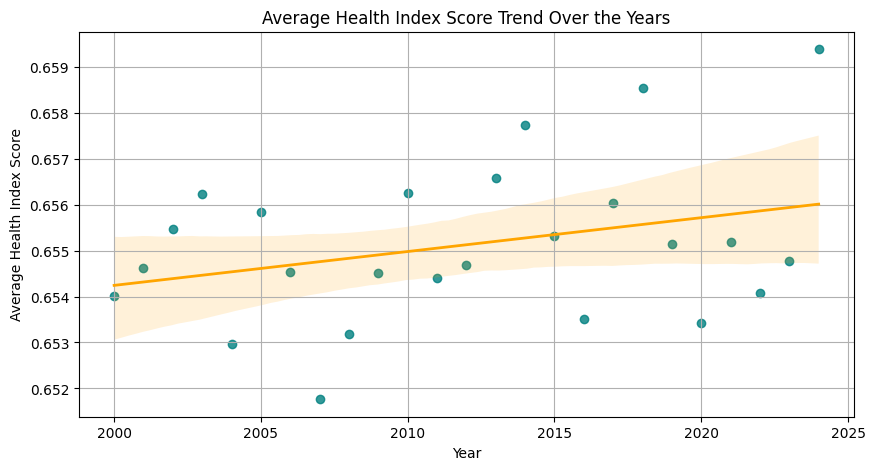

In [ ]:

# Group by Year and calculate average Health Index Score
avg_health_index = df.groupby("Year")["Health Index Score"].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 5))
sns.regplot(data=avg_health_index, x="Year", y="Health Index Score", scatter=True, marker="o", color="teal", line_kws={"color": "orange", "linewidth": 2})

plt.title("Average Health Index Score Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Health Index Score")
plt.grid(True)
plt.show()


The scatter plot with a trend line shows a slight upward trend in the Average Health Index Score over the years. While individual points fluctuate, the overall increase suggests gradual improvements in health conditions.

# Health Index Score: India vs. Dataset Average

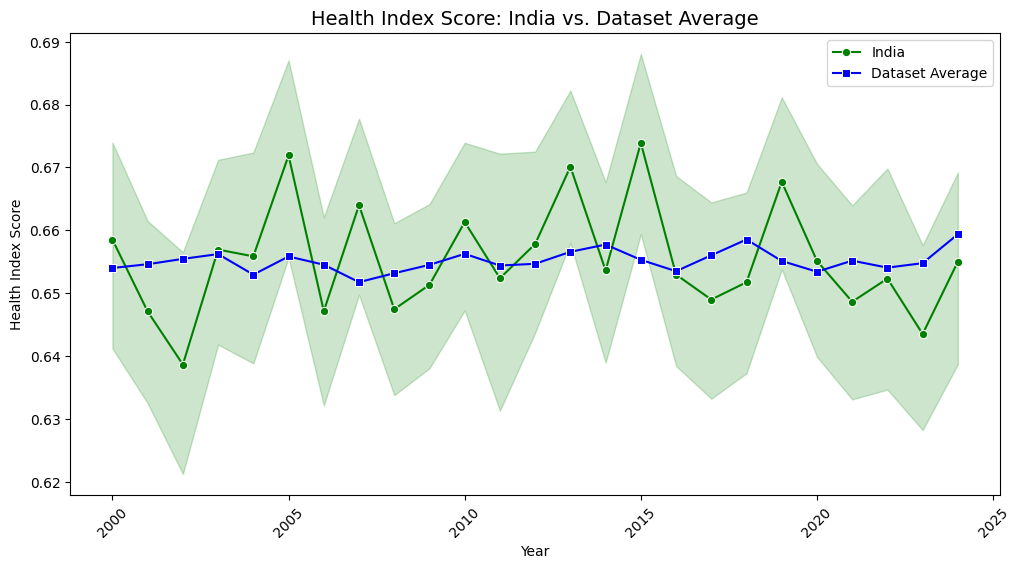

In [ ]:
india_df = df[df["Country"] == "India"]

# Calculate dataset-wide average Health Index Score
dataset_avg_health_index = df.groupby("Year")["Health Index Score"].mean()

# Line Plot: India vs. Dataset Average Health Index Score
plt.figure(figsize=(12, 6))
sns.lineplot(data=india_df, x="Year", y="Health Index Score", label="India", marker="o", color="green")
sns.lineplot(x=dataset_avg_health_index.index, y=dataset_avg_health_index.values, label="Dataset Average", marker="s", color="blue")

# Titles and labels
plt.title("Health Index Score: India vs. Dataset Average", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Health Index Score")
plt.legend()
plt.xticks(rotation=45)

# Show plot
plt.show()

India has shown a higher Health Index Score than the global average in several years but also dropped below it at times. Despite fluctuations, India's overall healthcare performance remains strong, with notable peaks around 2005, 2015, and 2018.

## Distribution of Treatment Costs Across Health Assessments

<ipython-input-18-f949e71bec17>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Health Assessment', y='Average Treatment Cost (USD)', palette='coolwarm')


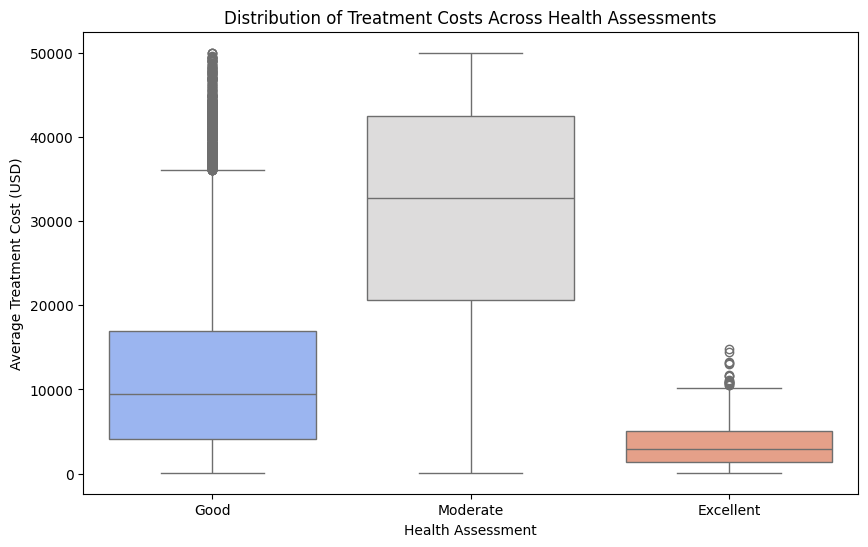

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Health Assessment', y='Average Treatment Cost (USD)', palette='coolwarm')
plt.title("Distribution of Treatment Costs Across Health Assessments")
plt.xlabel("Health Assessment")
plt.ylabel("Average Treatment Cost (USD)")
plt.show()




If a country has lower overall treatment costs, its health index score tends to be excellent. As treatment costs increase, the health index score decreases, moving from good to moderate. This indicates that countries with better healthcare systems and accessibility generally have lower medical expenses.

# Health Index Score vs Average Treatment Cost

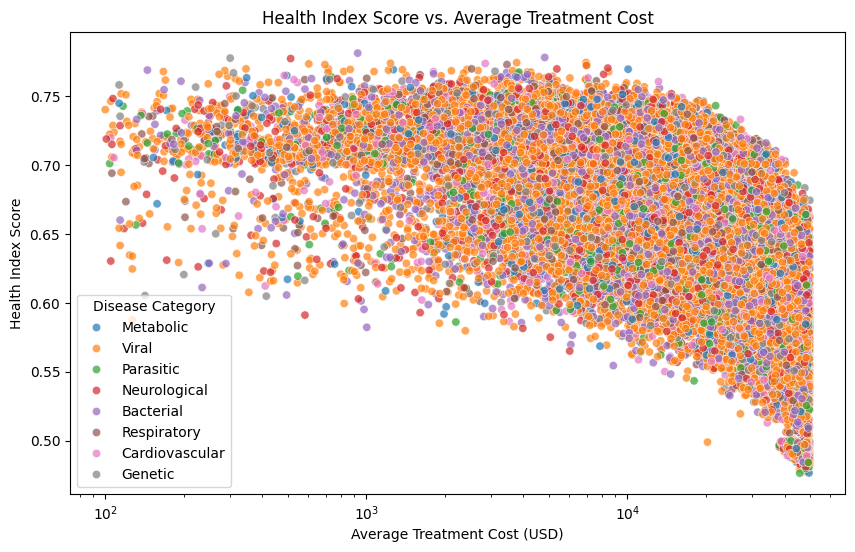

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Average Treatment Cost (USD)", y="Health Index Score", hue="Disease Category", alpha=0.7)
plt.title("Health Index Score vs. Average Treatment Cost")
plt.xlabel("Average Treatment Cost (USD)")
plt.ylabel("Health Index Score")
plt.xscale("log")  # If treatment cost has large variations
plt.show()



Higher treatment costs are associated with lower health index scores, suggesting a negative correlation between healthcare expenses and overall health outcomes.









# Average Healthcare Access (%) by Country (2020-2024)

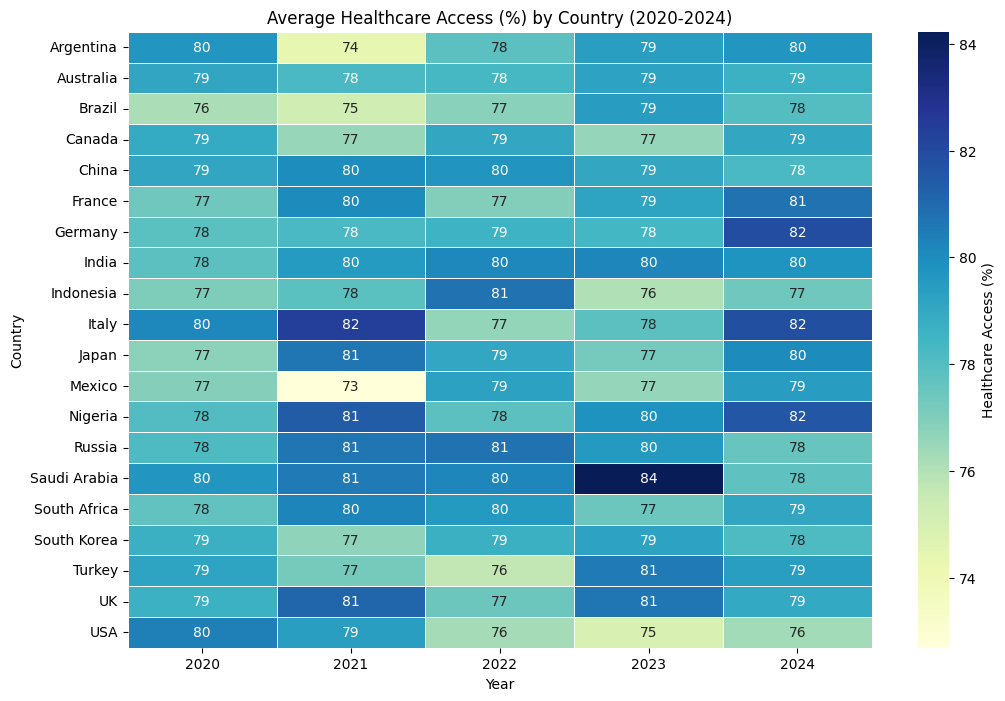

In [ ]:


# Ensure 'Year' is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter dataset for years 2020 to 2024
df_filtered = df[df['Year'].between(2020, 2024)]

# Pivot the data to get the mean Healthcare Access (%) for each country for each year
pivot_table = df_filtered.pivot_table(values='Healthcare Access (%)',
                                     index='Country',
                                     columns='Year',
                                     aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Healthcare Access (%)'}, linewidths=0.5)

# Set the plot labels and title
plt.title('Average Healthcare Access (%) by Country (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Country')

# Display the plot
plt.show()



Saudi Arabia had the highest access in 2023 (84%), while Mexico dropped in 2021 (73%). India, Australia, and South Korea remained stable, while Italy and Germany improved to 82% in 2024. The USA saw a decline in 2022-23.

# Average Mortality Rate by Disease and Year

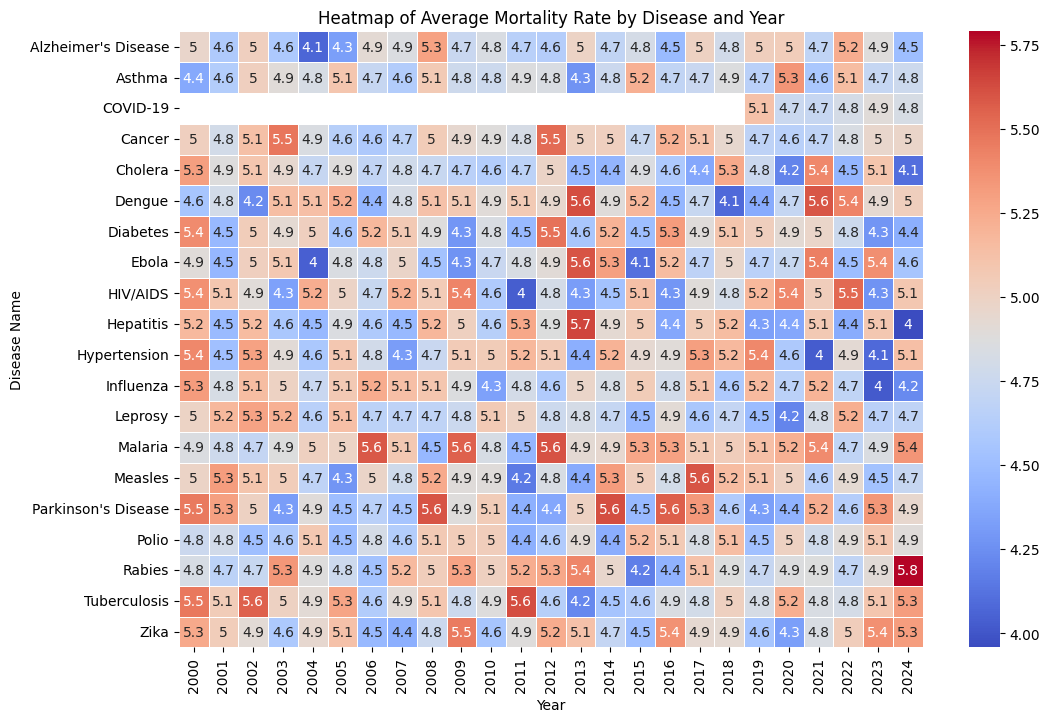

In [ ]:
heatmap_data = df.pivot_table(values='Mortality Rate (%)', index='Disease Name', columns='Year', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the plot labels and title
plt.title('Heatmap of Average Mortality Rate by Disease and Year')
plt.xlabel('Year')
plt.ylabel('Disease Name')
plt.show()




Mortality rates varied over the years, with Rabies peaking in 2024. Some diseases, like HIV/AIDS and Tuberculosis, showed a decline, while Malaria remained consistently high. COVID-19 had a significant impact in 2020.

# Education Index vs. Health Index Score

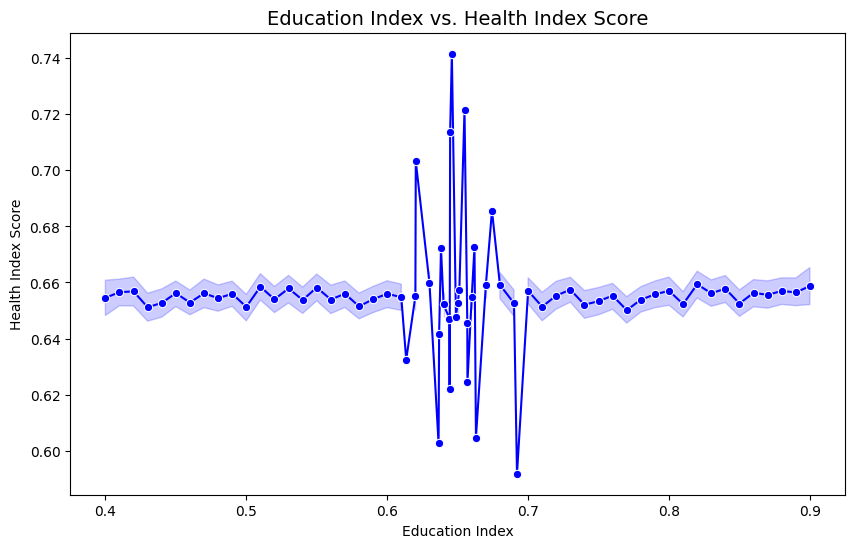

In [ ]:
df_sorted = df.sort_values("Education Index")

# Line Plot: Education Index vs. Health Index Score
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sorted, x="Education Index", y="Health Index Score", marker="o", color="blue")

# Titles and labels
plt.title("Education Index vs. Health Index Score", fontsize=14)
plt.xlabel("Education Index")
plt.ylabel("Health Index Score")

# Show plot
plt.show()

In the middle range of the education index, health scores fluctuate significantly, indicating that while education influences health, factors like the type of diseases prevalent and the effectiveness of medical treatments and recovery rates also play a role.

# Average Population Affected by Disease Category

<ipython-input-13-625d5f50fb90>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_population_by_disease_category.values, y=avg_population_by_disease_category.index, palette="Oranges_r")


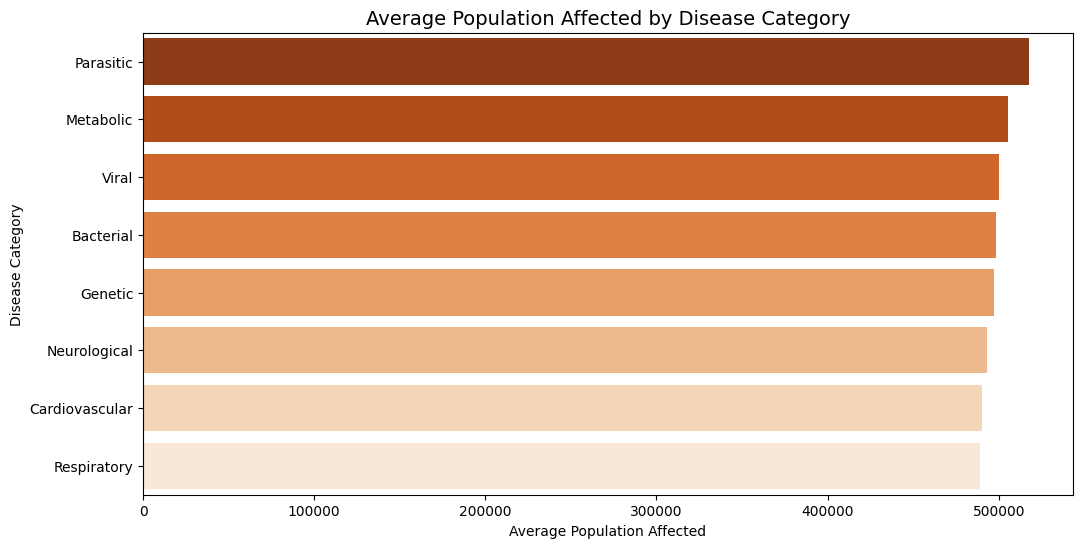

In [ ]:
avg_population_by_disease_category = df.groupby("Disease Category")["Population Affected"].mean().sort_values(ascending=False)

# Bar Plot: Average Population Affected by Disease Category
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_population_by_disease_category.values, y=avg_population_by_disease_category.index, palette="Oranges_r")

# Titles and labels
plt.title("Average Population Affected by Disease Category", fontsize=14)
plt.xlabel("Average Population Affected")
plt.ylabel("Disease Category")

# Show plot
plt.show()

Parasitic diseases affect the largest population, followed by metabolic and viral diseases, indicating a higher prevalence of these conditions. The relatively uniform distribution across disease categories suggests that various health challenges impact a significant portion of the population, emphasizing the need for widespread healthcare interventions

# Most Affected Age Group for Each Disease Category

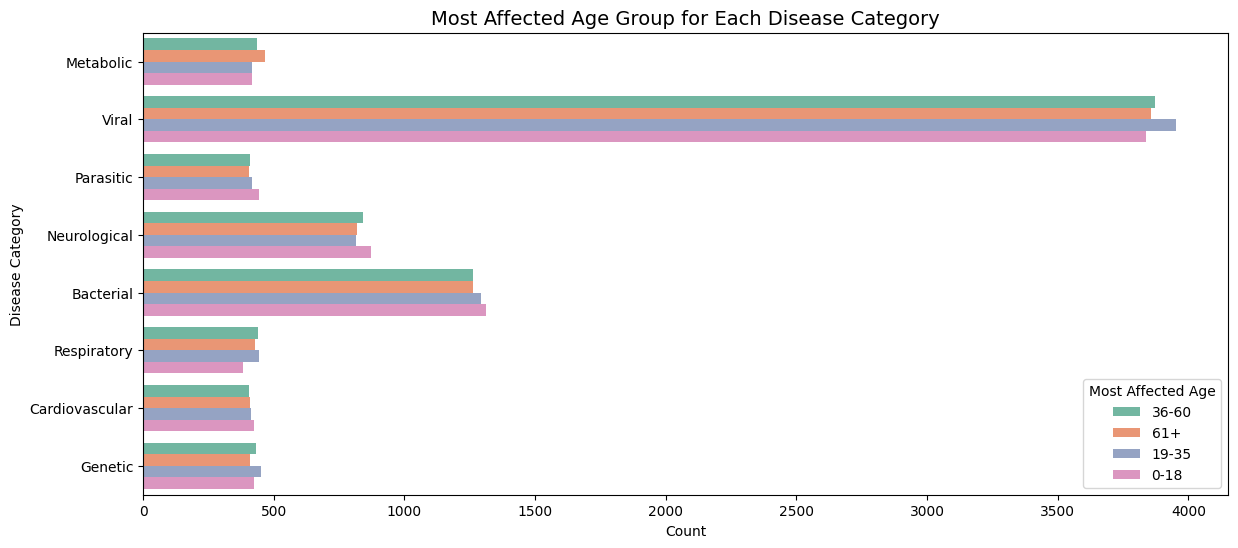

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, y="Disease Category", hue="Most Affected Age", palette="Set2")

# Titles and labels
plt.title("Most Affected Age Group for Each Disease Category", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Disease Category")
plt.legend(title="Most Affected Age")

# Show plot
plt.show()

Viral diseases affect all age groups the most, indicating high transmission rates. Bacterial and neurological diseases are more common in the 36-60 age group, while metabolic diseases primarily impact older adults (36-60 and 61+). Parasitic diseases are more prevalent among younger individuals (0-18, 19-35), whereas genetic conditions mostly affect younger groups due to inheritance. Cardiovascular and respiratory diseases are largely seen in older adults. Overall, disease susceptibility varies with age, with viral infections being the most widespread.

# India's Health Assessment Over the Years

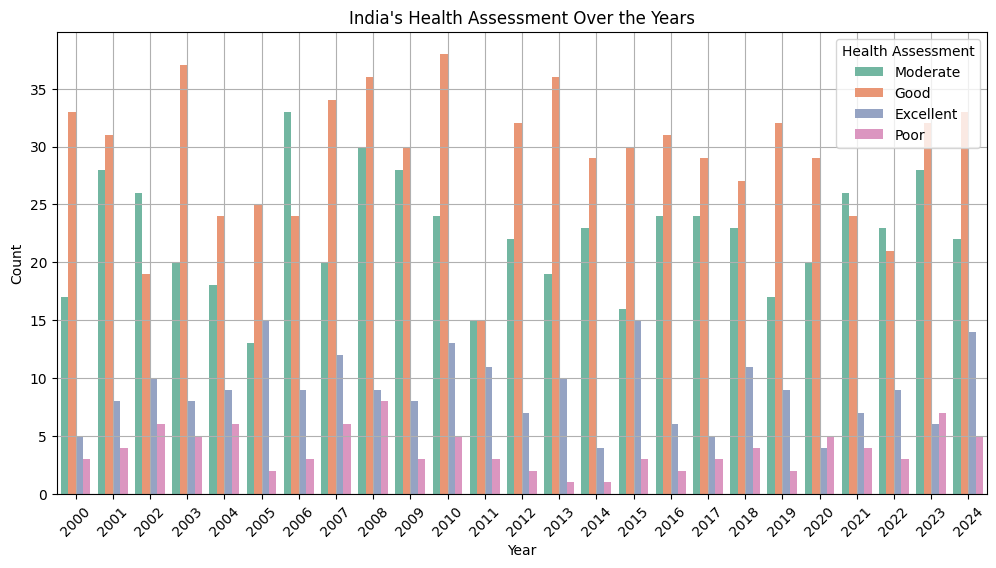

In [ ]:
# Filter for India only
df_india = df[df["Country"] == "India"]

# Create the count plot for Health Assessment by Year
plt.figure(figsize=(12, 6))
sns.countplot(data=df_india, x="Year", hue="Health Assessment", palette="Set2")

plt.title("India's Health Assessment Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Health Assessment")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()




India's health status has remained mostly in the Good and Moderate range, with minimal instances of Excellent health assessment

# Correlation Heatmap of Health Metrics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

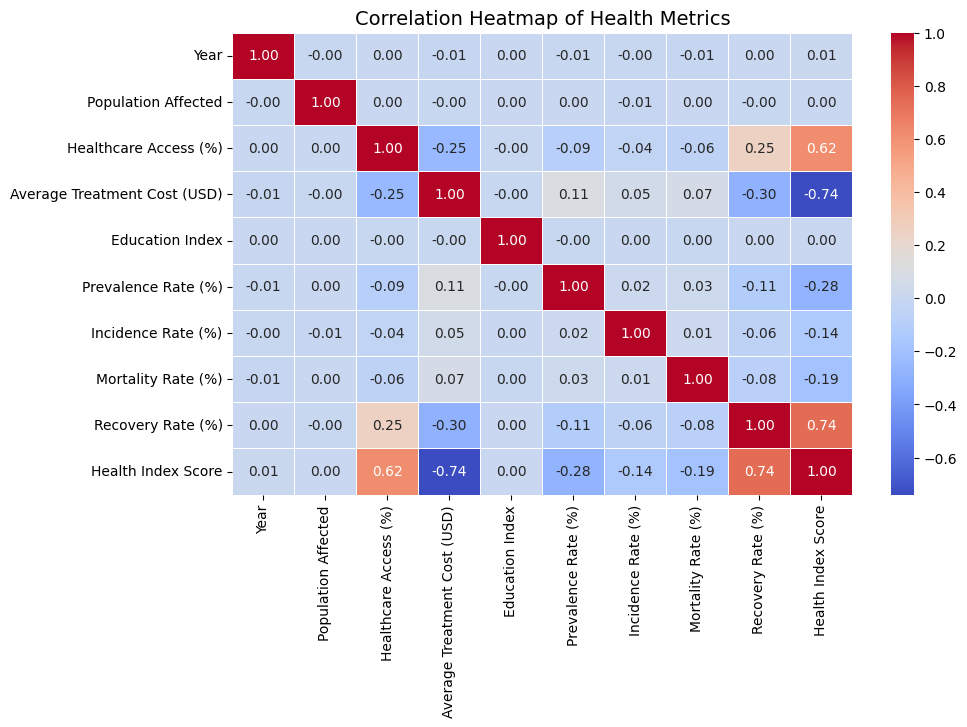

In [ ]:
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Health Metrics", fontsize=14)

# Show plot
plt.show()

Higher healthcare access and recovery rates strongly improve the health index, while high treatment costs, disease prevalence, and mortality rates negatively impact it. Reducing healthcare costs and improving access can significantly enhance overall health outcomes.

# Average Treatment Cost for Cancer in Each Country

<ipython-input-13-9714aaa55a6e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_treatment_cost.index, y=avg_treatment_cost.values, palette="coolwarm")


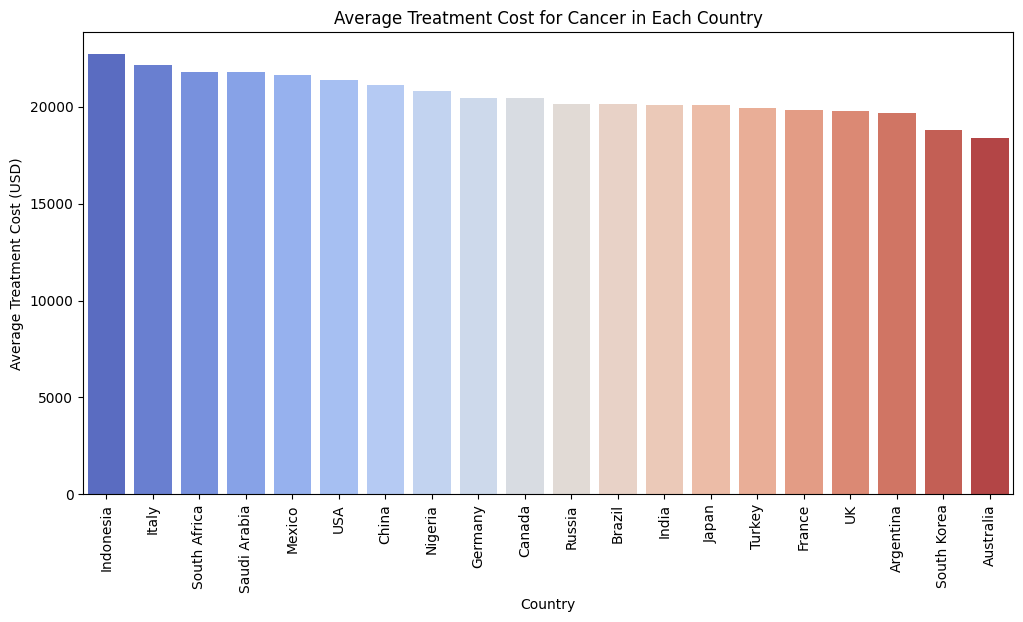

In [ ]:
# Filter data for Cancer
cancer_data = df[df["Disease Name"] == "Cancer"]

# Calculate the average treatment cost for Cancer in each country
avg_treatment_cost = cancer_data.groupby("Country")["Average Treatment Cost (USD)"].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_treatment_cost.index, y=avg_treatment_cost.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Average Treatment Cost (USD)")
plt.title("Average Treatment Cost for Cancer in Each Country")
plt.show()


Cancer treatment costs vary significantly across countries, with Indonesia, Italy, and South Africa having the highest costs (over $21,000 USD), while Australia and South Korea have the lowest, reflecting differences in healthcare systems and accessibility.